In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train.shape

(60000, 28, 28)

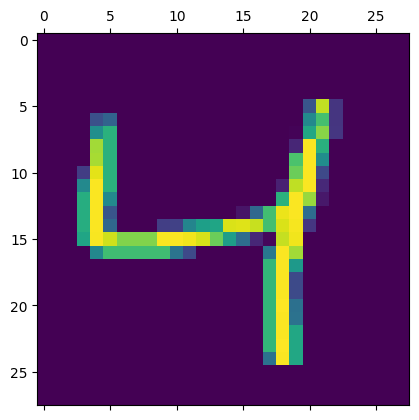

In [5]:
plt.matshow(x_train[2])

In [6]:
y_train[2]

4

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train_flattened=x_train.reshape(len(x_train), len(x_train[0])*len(x_train[0]))
x_test_flattened=x_test.reshape(len(x_test),len(x_test[0])*len(x_test[0]))

In [9]:
x_train_flattened.shape

(60000, 784)

In [10]:
x_test_flattened.shape

(10000, 784)

In [11]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model=keras.Sequential(
[
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train_flattened, y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4680 - accuracy: 0.8780
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2724 - accuracy: 0.9237
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9259
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9275
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9283
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9295
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9300
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.25

In [13]:
y_pred=model.predict(x_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [14]:
# a=y_pred[0]
# maxi=max(a)
# for i in range(len(a)):
#     if a[i]==maxi:
#         index=i
# print(index)
np.argmax(y_pred[1])

2

In [15]:
y_pred_labels=[ np.argmax(i) for i in y_pred ]

In [16]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    1,    6,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    3,    2,    6,    0],
       [   7,    9,  920,   18,    9,    5,   12,   10,   39,    3],
       [   4,    0,   14,  922,    1,   30,    2,   10,   23,    4],
       [   1,    2,    5,    3,  921,    0,   10,    7,   10,   23],
       [   9,    3,    1,   27,    7,  795,   13,    6,   28,    3],
       [  12,    3,    8,    1,    7,   18,  906,    1,    2,    0],
       [   2,    8,   18,    5,    4,    1,    0,  965,    2,   23],
       [   8,   16,    6,   23,    9,   33,    8,   12,  854,    5],
       [  10,    8,    1,    9,   29,   10,    0,   32,    7,  903]])>

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_labels)

0.9265

Text(95.72222222222221, 0.5, 'Truth')

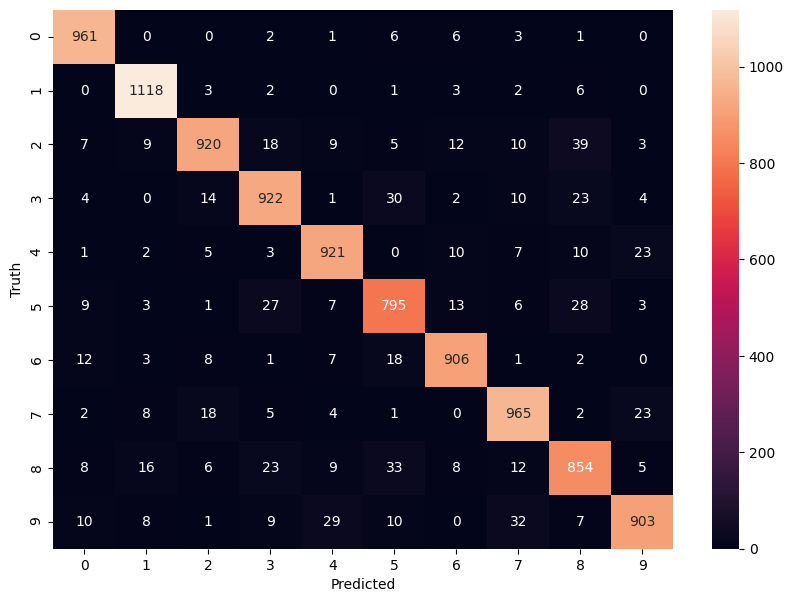

In [18]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
model2=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

tb_callback =keras.callbacks.TensorBoard(log_dir="/logs", histogram_freq=1)
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(x_train_flattened, y_train, epochs=25, callbacks=[tb_callback])

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2697 - accuracy: 0.9241
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1228 - accuracy: 0.9630
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0866 - accuracy: 0.9740
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0667 - accuracy: 0.9797
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9835
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0432 - accuracy: 0.9869
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0352 - accuracy: 0.9893
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.020

In [20]:
y_pred2=model2.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred2_labels=[np.argmax(i) for i in y_pred2]

In [22]:
cm2=tf.math.confusion_matrix(labels=y_test, predictions=y_pred2_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    0,    1,    0,    3,    2,    3,    0],
       [   0, 1125,    2,    1,    0,    0,    2,    1,    4,    0],
       [   5,    4, 1006,    0,    1,    0,    1,    7,    8,    0],
       [   0,    0,    5,  989,    1,    4,    0,    3,    2,    6],
       [   0,    0,    4,    1,  963,    0,    4,    2,    0,    8],
       [   3,    1,    0,    9,    1,  870,    1,    3,    3,    1],
       [   3,    2,    4,    1,    4,    4,  934,    0,    6,    0],
       [   3,    4,   10,    2,    0,    0,    1,  999,    3,    6],
       [   5,    1,    1,    9,    3,    1,    0,    2,  947,    5],
       [   1,    3,    0,    6,    9,    2,    1,    4,    1,  982]])>

Text(95.72222222222221, 0.5, 'Truth')

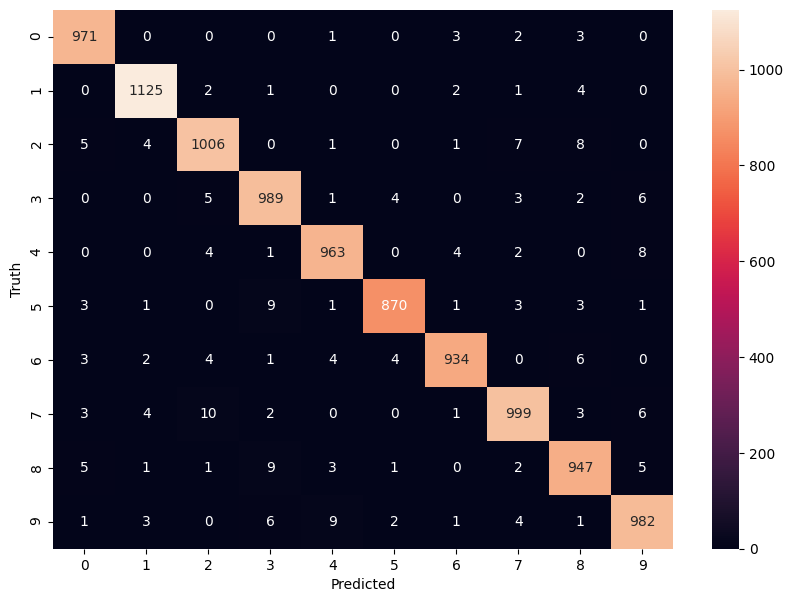

In [23]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [24]:
accuracy_score(y_test, y_pred2_labels)

0.9786

In [25]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14776), started 1:56:54 ago. (Use '!kill 14776' to kill it.)